In [1]:
import pandas as pd
import yaml
import numpy as np
import scipy.ndimage
import time, os, sys
import skimage.io
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from cellpose import utils
from matplotlib import cm
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops, regionprops_table
import math
from scipy.ndimage import gaussian_filter
import sys
from cellpose import models, io, plot
import os

2021-08-09 14:42:18,024 [INFO] WRITING LOG OUTPUT TO /home/wgiese/.cellpose/run.log


In [2]:
sys.path.append("../feature_extraction/")
import functions

In [4]:
parameter_file = "../feature_extraction/local/parameters_olya_test.yml"
parameters = functions.read_parameters(parameter_file)

In [5]:
filename = parameters['image_path']
img = skimage.io.imread(filename)
output_path = parameters['output_path']
output_filename = parameters["output_filename"]
output_filepath = output_path + output_filename

# extract channels

im_junction = img[:,:,parameters["channel_junction"]]
im_nucleus = img[:,:,parameters["channel_nucleus"]]
im_golgi = img[:,:,parameters["channel_golgi"]]
if parameters["channel_expression_marker"] >= 0:
    im_marker = img[:,:,parameters["channel_expression_marker"]]

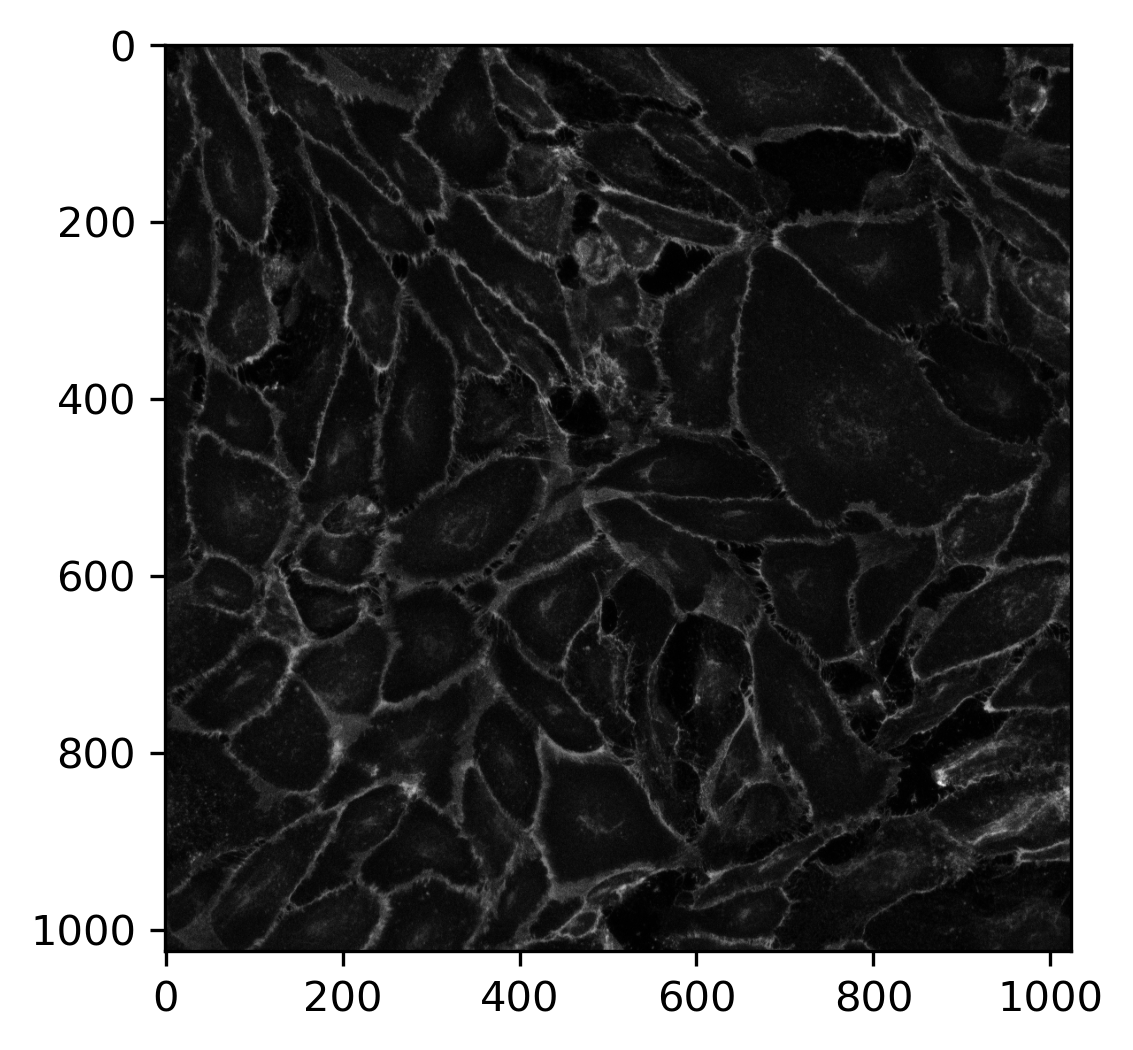

In [10]:
fig, ax = plt.subplots()
ax.imshow(im_junction, cmap=plt.cm.gray)

In [8]:
im_seg = np.array([im_junction, im_nucleus])


model = models.Cellpose(gpu=True, model_type='cyto')

channels = [1,2]

masks, flows, styles, diams = model.eval(im_seg, diameter=parameters["estimated_cell_diameter"], channels=channels)

io.masks_flows_to_seg(im_seg , masks, flows, diams, output_filename, channels)


2021-08-09 15:17:23,687 [INFO] ** TORCH CUDA version installed and working. **
2021-08-09 15:17:23,688 [INFO] >>>> using GPU
2021-08-09 15:17:23,777 [INFO] ~~~ FINDING MASKS ~~~


/home/wgiese/anaconda3/envs/cellpose/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/home/wgiese/anaconda3/envs/cellpose/lib/python3.7/site-packages/torch/nn/functional.py:3982: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


2021-08-09 15:17:24,606 [INFO] >>>> TOTAL TIME 0.83 sec


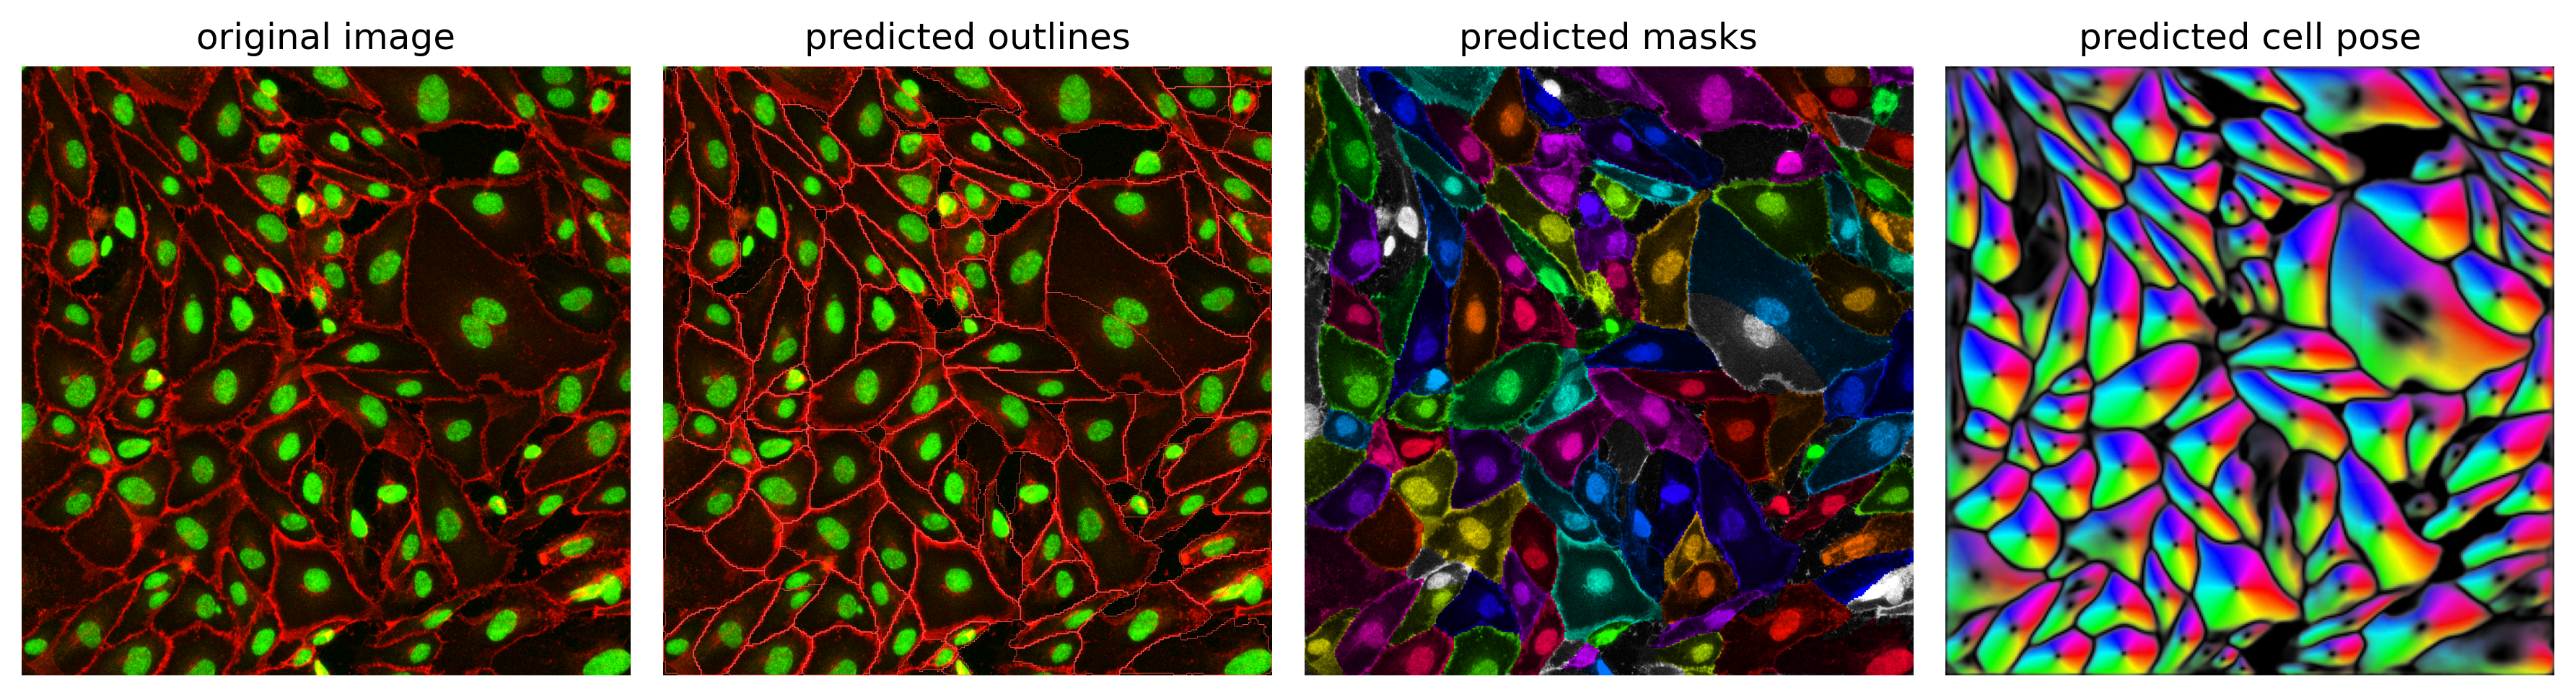

In [14]:
# DISPLAY RESULTS
from cellpose import plot

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, im_seg, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()

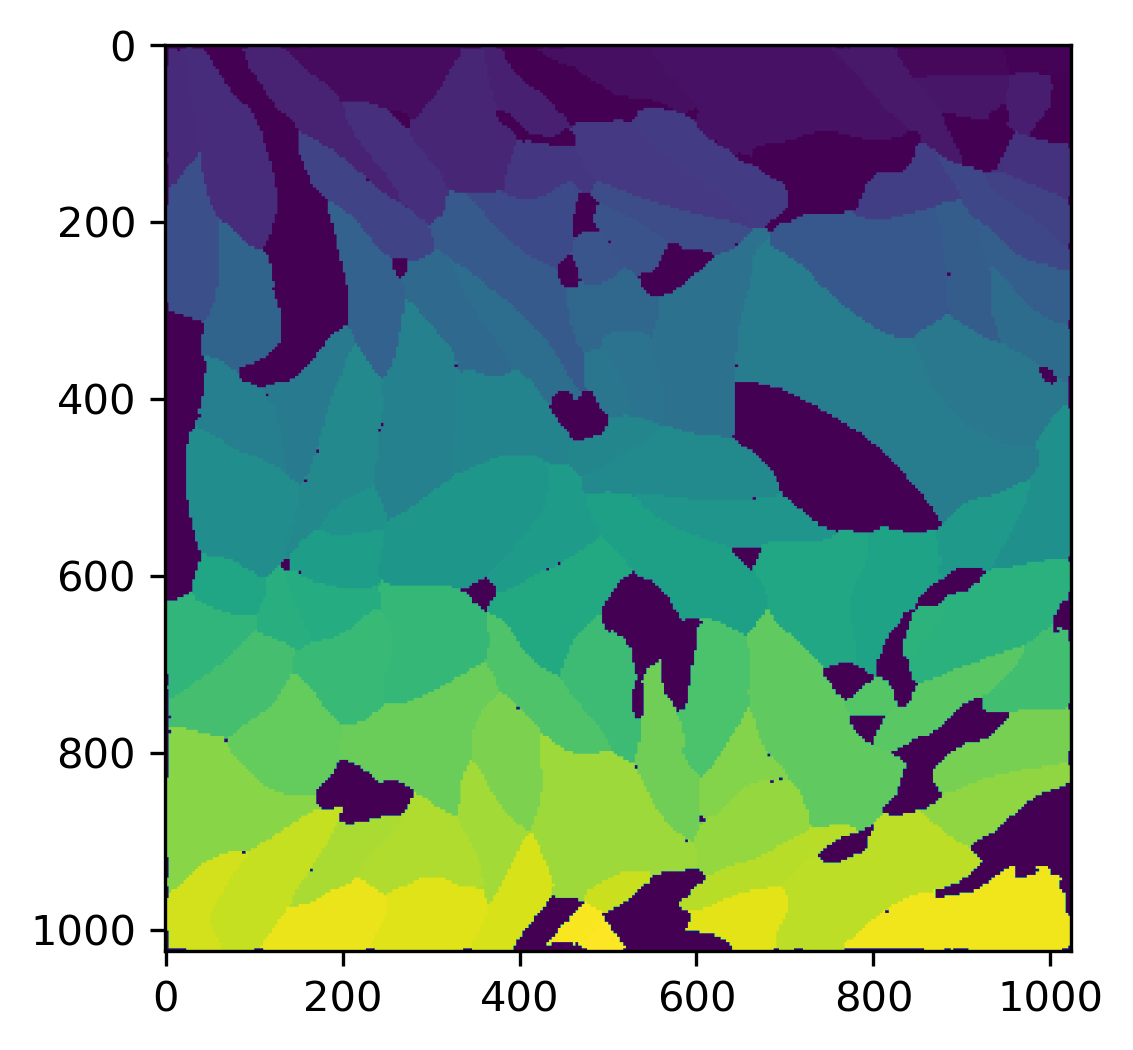

In [9]:
fig, ax = plt.subplots()
ax.imshow(masks)